In [53]:
# Annual Population Change 1993-2023 Last 30 years ın Ireland
# Annual Population Change being specifectly immigration and emigration 2019-2023 After Bretix 
# Annual Population Change being specifectly annual deaths/annual births during corona time 
# Annual Population Change being specifectly annual deaths/annual births during corona time 

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
data=pd.read_csv('PEA15.20231021T091018.csv')

In [56]:
data

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
...,...,...,...,...,...
243,Annual Population Change,2023,Immigrants,Thousand,141.6
244,Annual Population Change,2023,Emigrants,Thousand,64.0
245,Annual Population Change,2023,Net migration,Thousand,77.6
246,Annual Population Change,2023,Population change,Thousand,97.6


In [57]:
data.head(10)

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
5,Annual Population Change,1993,Net migration,Thousand,-0.4
6,Annual Population Change,1993,Population change,Thousand,19.6
7,Annual Population Change,1993,Population,Thousand,3574.1
8,Annual Population Change,1994,Annual births,Thousand,49.1
9,Annual Population Change,1994,Annual deaths,Thousand,32.6


In [58]:
data.head(8) #Why I have chosed just 8 rows cause of different components . We have different components they are displayed 8 rows .

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
5,Annual Population Change,1993,Net migration,Thousand,-0.4
6,Annual Population Change,1993,Population change,Thousand,19.6
7,Annual Population Change,1993,Population,Thousand,3574.1


#We can understand now for Year 1993 ; 
Annual births
Annual deaths
Natural increase
Immigrants
Emigrants
Net migration
Population change
Population

I am looking for how changed Ireland population last 30 years and I am gonna predict about next year population ; will they increase or not ? 
If Ireland population is gonna increase , net migraiton or natural increasing will be main reason ? 
Beside that I am gonna have a look , ıf there is increasing for population and it will have continued as before , how will be net migraiton or natural increasing . 
If the government wanna keep population as same as last year and how should be ifference for net migration ? Also , in this condition the goverment wants keep population as same as last year and if emigrants will not allowed to go somewhere else , to keep population stabil , how many immigrants they can accept here for 2024 ? I am gonna have a look answers of this questions .



In [59]:
data.shape #We can have a look data shape . In this data we have 248 rows and 5 columns .

(248, 5)

In [60]:
data.describe() #We can learn how many variables we have and max value or min value or more

,Year,VALUE
count,248.000000,248.000000
mean,2008.000000,582.497581
std,8.962359,1434.688854
min,1993.000000,-27.500000
25%,2000.000000,29.800000
50%,2008.000000,48.350000
75%,2016.000000,73.300000
max,2023.000000,5281.600000


In [61]:
data.describe(include=object) #We can search datas detailly here . As you can see , for example we can understand how many unique or frequency values

,STATISTIC Label,Component,UNIT
count,248,248,248
unique,1,8,1
top,Annual Population Change,Annual births,Thousand
freq,248,31,248


In [62]:
data.info() #We can have an idea about our data . How many floats , integers or objects we have

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  248 non-null    object 
 1   Year             248 non-null    int64  
 2   Component        248 non-null    object 
 3   UNIT             248 non-null    object 
 4   VALUE            248 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 9.8+ KB


After all , before I start I have to be sure there is no missing data . Unless I have any missing data , I can start read data but ıf I have , I should detect them and have to find a solution . Maybe , I can chance them as ' 0' , maybe I can take value from another randomly slected sample , maybe I can use mean or median , maybe I can use interpolate . 

In [63]:
null_filter = data['STATISTIC Label'].isnull()
print(data[null_filter])
print(data[null_filter].shape)

#We are having look to see if we have missign data for Statıstıc Label column

Empty DataFrame
Columns: [STATISTIC Label, Year, Component, UNIT, VALUE]
Index: []
(0, 5)


In [64]:
null_filter = data['Year'].isnull()
print(data[null_filter])
print(data[null_filter].shape)

#We are having look to see if we have missign data for Year column

Empty DataFrame
Columns: [STATISTIC Label, Year, Component, UNIT, VALUE]
Index: []
(0, 5)


In [65]:
null_filter = data['Component'].isnull()
print(data[null_filter])
print(data[null_filter].shape)

#We are having look to see if we have missign data for Component column

Empty DataFrame
Columns: [STATISTIC Label, Year, Component, UNIT, VALUE]
Index: []
(0, 5)


In [66]:
null_filter = data['UNIT'].isnull()
print(data[null_filter])
print(data[null_filter].shape)

#We are having look to see if we have missign data for UNIT column

Empty DataFrame
Columns: [STATISTIC Label, Year, Component, UNIT, VALUE]
Index: []
(0, 5)


In [67]:
null_filter = data['VALUE'].isnull()
print(data[null_filter])
print(data[null_filter].shape)

#We are having look to see if we have missign data for VALUE column

Empty DataFrame
Columns: [STATISTIC Label, Year, Component, UNIT, VALUE]
Index: []
(0, 5)


In [68]:
null_filter = data['STATISTIC Label'].notnull()
print(data[null_filter])
print(data[null_filter].shape)

#We wanna be sure we do not have any missing data 

              STATISTIC Label  Year          Component      UNIT   VALUE
0    Annual Population Change  1993      Annual births  Thousand    50.4
1    Annual Population Change  1993      Annual deaths  Thousand    30.4
2    Annual Population Change  1993   Natural increase  Thousand    20.0
3    Annual Population Change  1993         Immigrants  Thousand    34.7
4    Annual Population Change  1993          Emigrants  Thousand    35.1
..                        ...   ...                ...       ...     ...
243  Annual Population Change  2023         Immigrants  Thousand   141.6
244  Annual Population Change  2023          Emigrants  Thousand    64.0
245  Annual Population Change  2023      Net migration  Thousand    77.6
246  Annual Population Change  2023  Population change  Thousand    97.6
247  Annual Population Change  2023         Population  Thousand  5281.6

[248 rows x 5 columns]
(248, 5)


In [69]:
null_filter = data['Year'].notnull()
print(data[null_filter])
print(data[null_filter].shape)

#We wanna be sure we do not have any missing data 

              STATISTIC Label  Year          Component      UNIT   VALUE
0    Annual Population Change  1993      Annual births  Thousand    50.4
1    Annual Population Change  1993      Annual deaths  Thousand    30.4
2    Annual Population Change  1993   Natural increase  Thousand    20.0
3    Annual Population Change  1993         Immigrants  Thousand    34.7
4    Annual Population Change  1993          Emigrants  Thousand    35.1
..                        ...   ...                ...       ...     ...
243  Annual Population Change  2023         Immigrants  Thousand   141.6
244  Annual Population Change  2023          Emigrants  Thousand    64.0
245  Annual Population Change  2023      Net migration  Thousand    77.6
246  Annual Population Change  2023  Population change  Thousand    97.6
247  Annual Population Change  2023         Population  Thousand  5281.6

[248 rows x 5 columns]
(248, 5)


After all controls we are sure we do not have any missing data and we can start to read data for our questions 

In [70]:
data

,STATISTIC Label,Year,Component,UNIT,VALUE
0,Annual Population Change,1993,Annual births,Thousand,50.4
1,Annual Population Change,1993,Annual deaths,Thousand,30.4
2,Annual Population Change,1993,Natural increase,Thousand,20.0
3,Annual Population Change,1993,Immigrants,Thousand,34.7
4,Annual Population Change,1993,Emigrants,Thousand,35.1
...,...,...,...,...,...
243,Annual Population Change,2023,Immigrants,Thousand,141.6
244,Annual Population Change,2023,Emigrants,Thousand,64.0
245,Annual Population Change,2023,Net migration,Thousand,77.6
246,Annual Population Change,2023,Population change,Thousand,97.6


In [ ]:
#After all I know my data clearly and I know values are thousand and I wanna drop this column for discreasing datas .

In [71]:
to_drop=['UNIT']

In [72]:
data.drop(to_drop,inplace=True,axis=1)

In [73]:
data #We are gonna see our data without UNIT column

,STATISTIC Label,Year,Component,VALUE
0,Annual Population Change,1993,Annual births,50.4
1,Annual Population Change,1993,Annual deaths,30.4
2,Annual Population Change,1993,Natural increase,20.0
3,Annual Population Change,1993,Immigrants,34.7
4,Annual Population Change,1993,Emigrants,35.1
...,...,...,...,...
243,Annual Population Change,2023,Immigrants,141.6
244,Annual Population Change,2023,Emigrants,64.0
245,Annual Population Change,2023,Net migration,77.6
246,Annual Population Change,2023,Population change,97.6


In [74]:
data.shape #We can notice than here we have already dropped some datas

(248, 4)

And now we can bring chancing Ireland population .

In [77]:
import pandas as pd
data = pd.read_csv("PEA15.20231021T091018.csv")
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Population")
year_1993_2023_population = data[filtre]
values_population = year_1993_2023_population['VALUE']
print(values_population)

7      3574.1
15     3585.9
23     3601.3
31     3626.1
39     3664.3
47     3703.1
55     3741.6
63     3789.5
71     3847.2
79     3917.2
87     3979.9
95     4045.2
103    4133.8
111    4232.9
119    4375.8
127    4485.1
135    4533.4
143    4554.8
151    4574.9
159    4593.7
167    4614.7
175    4645.4
183    4687.8
191    4739.6
199    4810.9
207    4884.9
215    4958.5
223    5029.9
231    5074.7
239    5184.0
247    5281.6
Name: VALUE, dtype: float64


As you see population is going up every year . Another way to explain it , population are increased .

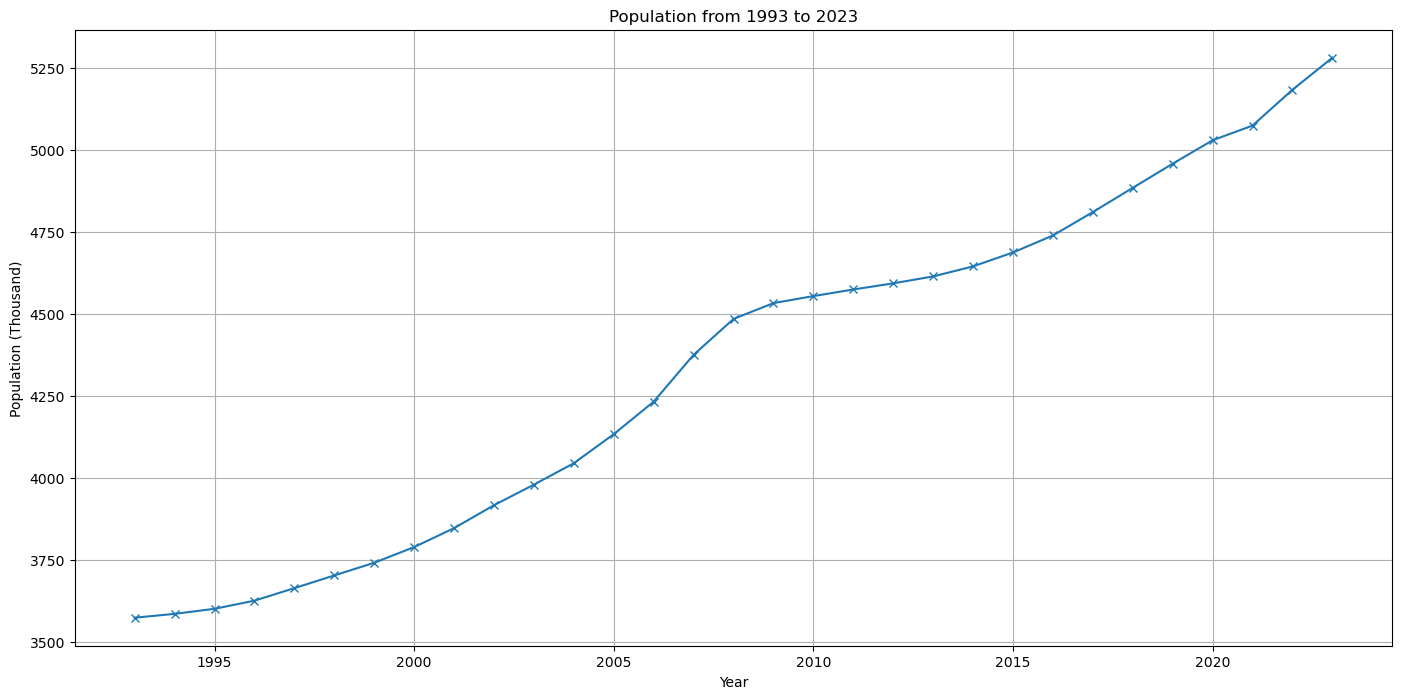

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("PEA15.20231021T091018.csv")
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Population")
population_data = data[filtre]
values = population_data['VALUE']
years = population_data['Year']

plt.figure(figsize=(17, 8))
plt.plot(years, values , marker='x')
plt.title("Population from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Population (Thousand)")
plt.grid(True)

plt.show()

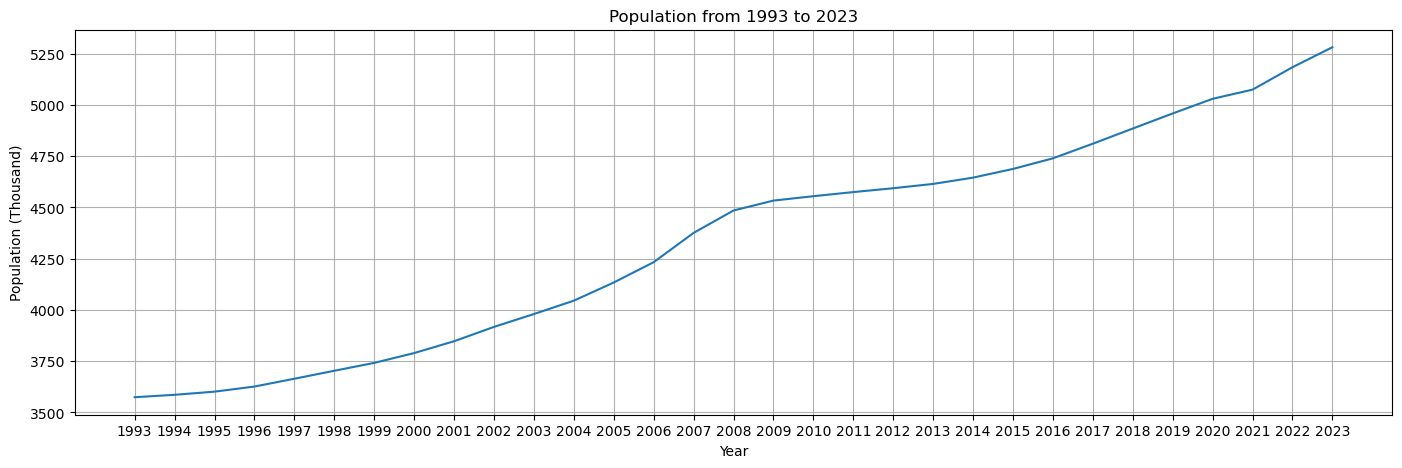

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("PEA15.20231021T091018.csv")
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Population")
population_data = data[filtre]
values = population_data['VALUE']
years = population_data['Year']

plt.figure(figsize=(17, 5))
plt.plot(years, values)
plt.title("Population from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Population (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

As you can see , strongly or slowly , there is something here apperantly , population increases every year and there is huge difference between 30 years 

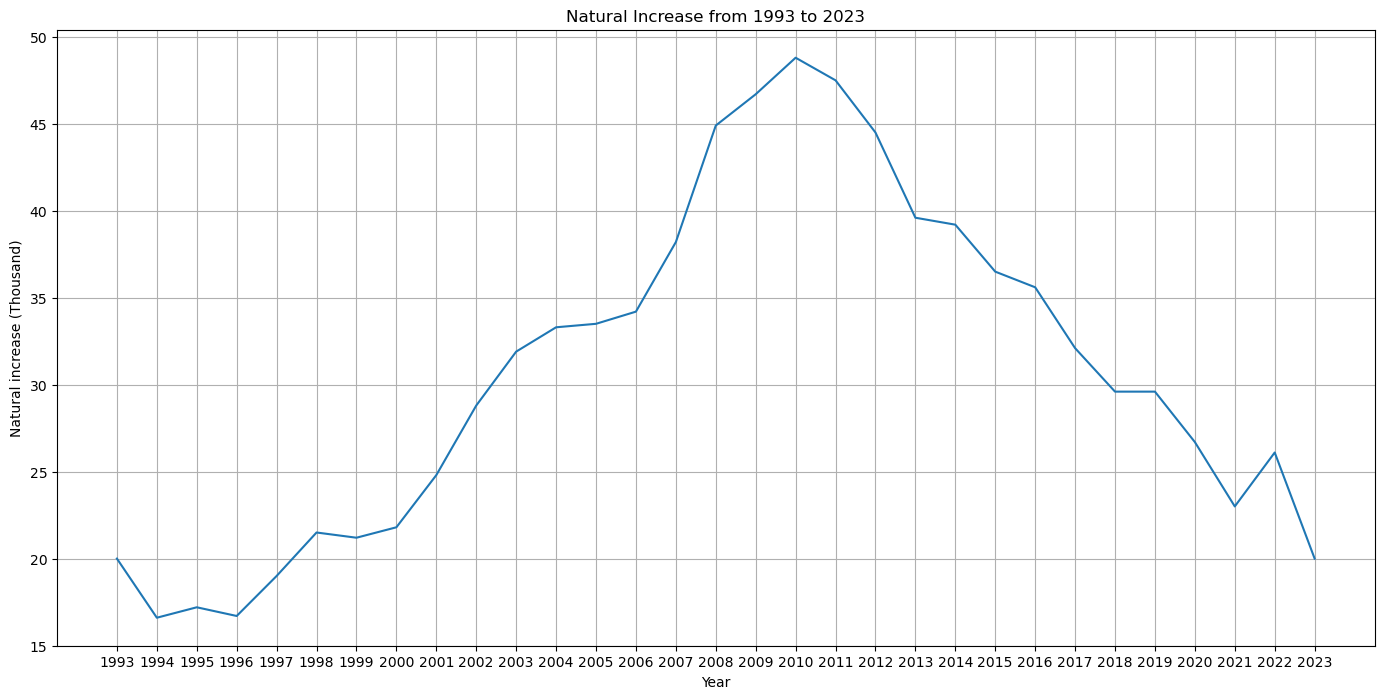

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("PEA15.20231021T091018.csv")
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Natural increase")
natural_increase_data= data[filtre]
values = natural_increase_data['VALUE']
years = natural_increase_data['Year']

plt.figure(figsize=(17, 8))
plt.plot(years, values)
plt.title("Natural Increase from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Natural increase (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

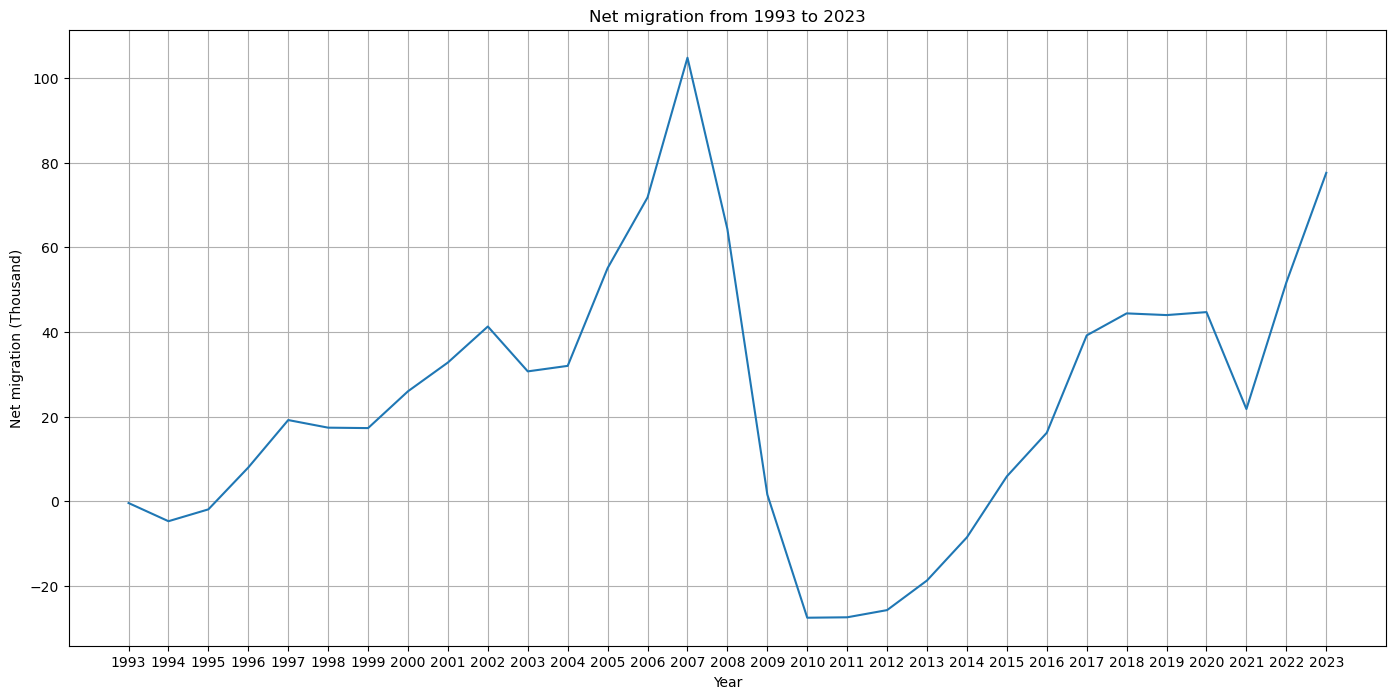

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("PEA15.20231021T091018.csv")
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Net migration")
net_migration_data= data[filtre]
values = net_migration_data['VALUE']
years = net_migration_data['Year']

plt.figure(figsize=(17, 8))
plt.plot(years, values)
plt.title("Net migration from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Net migration (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

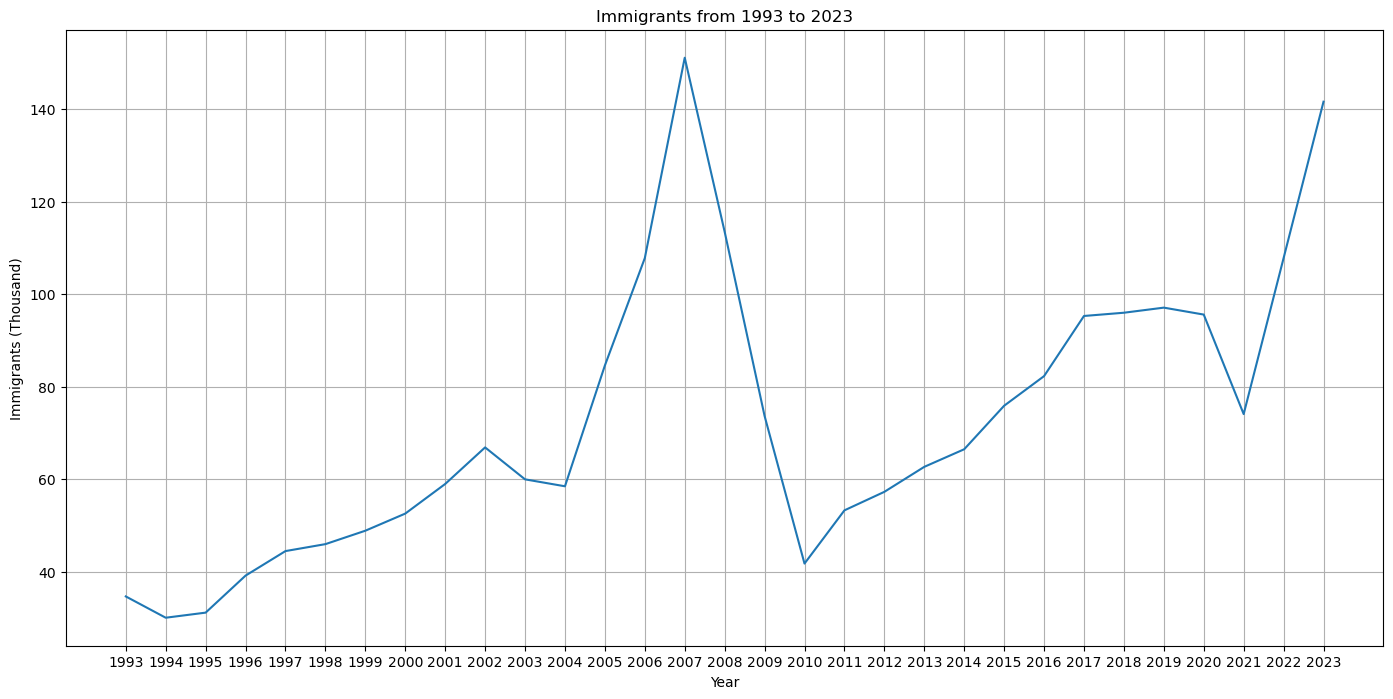

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("PEA15.20231021T091018.csv")
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Immigrants")
immigrants_data= data[filtre]
values = immigrants_data['VALUE']
years = immigrants_data['Year']

plt.figure(figsize=(17, 8))
plt.plot(years, values)
plt.title("Immigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Immigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()

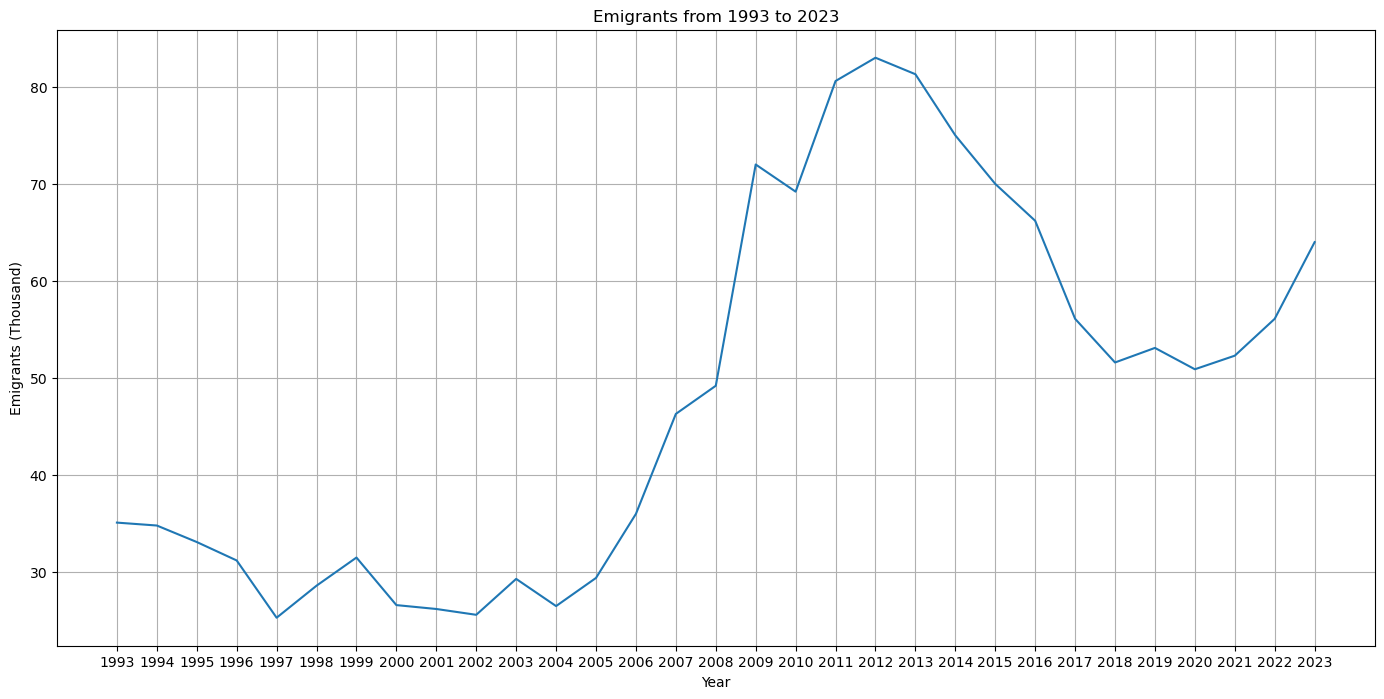

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("PEA15.20231021T091018.csv")
filtre = (data['Year'] >= 1993) & (data['Year'] <= 2023) & (data['Component'] == "Emigrants")
emigrants_data= data[filtre]
values = emigrants_data['VALUE']
years = emigrants_data['Year']

plt.figure(figsize=(17, 8))
plt.plot(years, values)
plt.title("Emigrants from 1993 to 2023")
plt.xlabel("Year")
plt.ylabel("Emigrants (Thousand)")
plt.grid(True)
plt.xticks(years)

plt.show()